In [14]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from scipy.sparse import csr_matrix

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
import knn_recommender as recommender

In [21]:
from sklearn.neighbors import NearestNeighbors

In [22]:
# pip install fuzzywuzzy

In [23]:
from fuzzywuzzy import process

In [ ]:
import Recommenders as Recommenders # here we imported an important module . This Recommenders is a file. We import 
the file and use the codes inside it. All the three i.e content based, collaberative and popularity every thing is inside the 
Recommenders file . Here we will use directly the code . Any change required can be done in the file .

In [ ]:
# Loading the dataset/Reading the file

In [ ]:
#We have used last.fm, a freely available collection of songs for meditation and relaxation 

In [ ]:
We have used 2 data set. Triplets file consists of user id, song id and listen count. Metadeta file consist of
song id, track name/title, artist name, type and album

In [24]:
song_df_1 = pd.read_csv('C:/Users/aabdu/Desktop/Data Science Project/Data set/triplets_file.csv')
song_df_1.head()

,User id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [25]:
song_df_1.rename(columns={'User id':'User_id'},inplace=True)

In [26]:
song_df_1.head()

,User_id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [27]:
song_df_2 = pd.read_csv('C:/Users/aabdu/Desktop/Data Science Project/Data set/song_data.csv')
song_df_2.head()

,Song_id,Title,Artist_name,Type,Album Link
0,S1,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,S2,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,S3,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,S4,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,S5,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


In [28]:
#Song_id are the common key . if we want to combine anything we can use this common key to combine it 

In [ ]:
#Combining both the data into a single dataframe 

In [ ]:
song_df_2 info can be used to get some keywords to get some related songs for content based . For collaberative we can use users history of song_df_1 and give some recommendation 

In [29]:
song_df=pd.merge(song_df_1,song_df_2, on='Song_id', how='left') 
song_df.head()

,User_id,Song_id,Listen_count,Title,Artist_name,Type,Album Link
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


In [30]:
print(len(song_df_1),len(song_df_2))

1079 1079


In [ ]:
# Data Exploration and Cleaning - The first step in any analysis should start with data understanding and this 
can be done with EDA process. 
Before we dive into data visualizations, lets get a look on the descriptive statistics from the Music Data set.

In [31]:
song_df.shape 

(1079, 7)

In [32]:
song_df.describe()  

,Listen_count
count,1079.000000
mean,5.515292
std,14.136018
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,272.000000


In [33]:
song_df.describe(include='all')

,User_id,Song_id,Listen_count,Title,Artist_name,Type,Album Link
count,1079,1079,1079.000000,1079,1079,1079,1079
unique,26,1079,NaN,1035,6,1,1037
top,5a905f000fc1ff3df7ca807d57edb608863db05d,S467,NaN,Termoil,Ravi Shankar,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Silence+Is+...
freq,395,1,NaN,2,423,1079,2
mean,NaN,NaN,5.515292,NaN,NaN,NaN,NaN
std,NaN,NaN,14.136018,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [34]:
song_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_id       1079 non-null   object
 1   Song_id       1079 non-null   object
 2   Listen_count  1079 non-null   int64 
 3   Title         1079 non-null   object
 4   Artist_name   1079 non-null   object
 5   Type          1079 non-null   object
 6   Album Link    1079 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.4+ KB


In [35]:
song_df.dtypes

User_id         object
Song_id         object
Listen_count     int64
Title           object
Artist_name     object
Type            object
Album Link      object
dtype: object

In [36]:
song_df.isnull().sum() 

User_id         0
Song_id         0
Listen_count    0
Title           0
Artist_name     0
Type            0
Album Link      0
dtype: int64

In [37]:
#Exploring some charecteristics of the data 

In [38]:
song_df.nunique()  

User_id           26
Song_id         1079
Listen_count      55
Title           1035
Artist_name        6
Type               1
Album Link      1037
dtype: int64

In [39]:
print(song_df['Artist_name'].unique()) 

['Deuter' 'Krishna Das' 'Ephemeral Mists' 'Ravi Shankar' 'Snatam Kaur'
 'World of Osho']


In [40]:
song_df['Artist_name'].nunique()  

6

In [41]:
song_df['User_id'].unique()  

array(['b80344d063b5ccb3212f76538f3d9e43d87dca9e',
       '85c1f87fea955d09b4bec2e36aee110927aedf9a',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856',
       '8937134734f869debcab8f23d77465b4caaa85df',
       '969cc6fb74e076a68e36a04409cb9d3765757508',
       '4bd88bfb25263a75bbdd467e74018f4ae570e5df',
       'e006b1a48f466bf59feefed32bec6494495a4436',
       '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec',
       '9bb911319fbc04f01755814cb5edb21df3d1a336',
       'b64cdd1a0bd907e5e00b39e345194768e330d652',
       '17aa9f6dbdf753831da8f38c71b66b64373de613',
       'd6589314c0a9bcbca4fee0c93b14bc402363afea',
       '5a905f000fc1ff3df7ca807d57edb608863db05d',
       'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1',
       '45544491ccfcdc0b0803c34f201a6287ed4e30f8',
       'ed7d4c476013b1c3dd91982b61494bf7436083ba',
       'baf47ed8da24d607e50d8684cde78b923538640f',
       '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf',
       'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8',
       'bd8475385f0aa78830fa6df

In [42]:
song_df['User_id'].nunique() 

26

In [43]:
song_df['Song_id'].unique() 

array(['S1', 'S2', 'S3', ..., 'S1091', 'S1092', 'S1093'], dtype=object)

In [44]:
song_df['Song_id'].nunique() 

1079

In [ ]:
#For creating key words we are combining Title and artist name. We create a single song key word.

In [45]:
song_df['song']=song_df['Title']+'-'+song_df['Artist_name']
song_df.head()

,User_id,Song_id,Listen_count,Title,Artist_name,Type,Album Link,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales,Spirales-Deuter
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...,Lovesong from the Mountains-Deuter
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit,Kindred Spirit-Deuter
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...,Temple of Silence-Deuter
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love,Hands Of Love-Deuter


In [46]:
song_grouped = song_df.groupby(['User_id']).agg({'Listen_count':'sum'}).reset_index()
song_grouped.head() 

,User_id,Listen_count
0,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,30
1,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,32
2,17aa9f6dbdf753831da8f38c71b66b64373de613,149
3,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,15
4,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,38


In [47]:
song_grouped = song_df.groupby(['song']).agg({'Listen_count':'sum'}).reset_index()
song_grouped.head()

,song,Listen_count
0,01 Madhuvanti-Ravi Shankar,2
1,02 Dhun in mishra mand-Ravi Shankar,1
2,11. Nirvana Road (Дорога в нирвану)-Deuter,1
3,4AM Hanuman Chalisa-Krishna Das,13
4,Aad Guray Nameh (Protection of the Heart)-Snat...,2


In [48]:
grouped_sum = song_grouped['Listen_count'].sum()

In [49]:
song_grouped['percentage'] = song_grouped['Listen_count'] / grouped_sum * 100 

In [50]:
song_df_1.sort_values(['Listen_count','User_id'], ascending=[0,1])

,User_id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
914,bd8475385f0aa78830fa6dfce9e7242164b035c8,S928,124
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
...,...,...,...
1061,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1076,1
1062,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1077,1
1063,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1078,1
1064,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192,S1079,1


In [ ]:
# So above the highest listen count is 401 for user id 5a905f000fc1ff3df7ca807d57edb608863db05d and 
the % is calculated correspondingly 

In [51]:
grouped_sum = song_grouped['Listen_count'].sum()   

In [52]:
song_grouped['percentage'] = (song_grouped['Listen_count'] / grouped_sum) * 100 

In [53]:
song_grouped.sort_values(['Listen_count','song'], ascending=[0,1])    

,song,Listen_count,percentage
862,Spirales-Deuter,272,4.570660
442,Lovesong from the Mountains-Deuter,130,2.184507
515,Mul Mantra-Snatam Kaur,124,2.083683
406,Kindred Spirit-Deuter,120,2.016468
923,Temple of Silence-Deuter,105,1.764409
...,...,...,...
1027,Zauberwald-Deuter,1,0.016804
1028,allah rocking-Ravi Shankar,1,0.016804
1029,instrumental 2-Ravi Shankar,1,0.016804
1032,loving a buddha-Deuter,1,0.016804


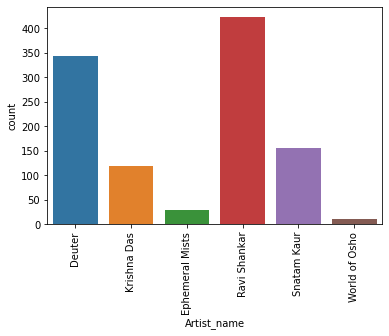

In [54]:
sns.countplot('Artist_name', data=song_df)
plt.xticks(rotation=90)
plt.show()

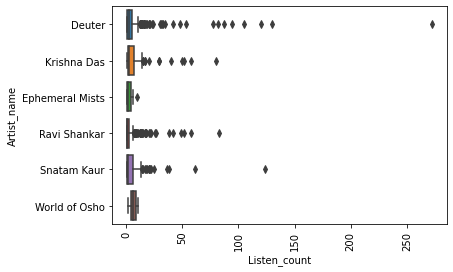

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot( x="Listen_count", y='Artist_name', data=song_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Most popular songs

In [ ]:
How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. 
Note that while we are using listen_count, we only care about the number of rows, we don't consider the number present 
in that row. This number represents how many times one user listen to the same song.

In [ ]:
#count how many rows we have by song, we show only the five more popular songs 

In [56]:
five_pop_songs = song_df.groupby('Title')['Listen_count'].count().reset_index().sort_values(['Listen_count', 'Title'], ascending = [0,1])

In [57]:
five_pop_songs['percentage']  = round(five_pop_songs['Listen_count'].div(five_pop_songs['Listen_count'].sum())*100, 2)

In [58]:
five_pop_songs = five_pop_songs[:5]
five_pop_songs

,Title,Listen_count,percentage
59,Badal Dekh Dari,2,0.19
110,Charly Theme and Resolution,2,0.19
138,Concerto for Sitar and Orchestra: III. Raga Adana,2,0.19
166,Der Turm/Fluchpunkt,2,0.19
180,Dhun (Folk Airs) (Remastered),2,0.19


In [59]:
labels = five_pop_songs['Title'].tolist()
counts = five_pop_songs['Listen_count'].tolist()

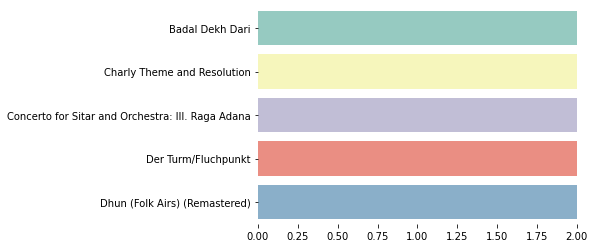

In [60]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [ ]:
Most popular artist

In [ ]:
For the next task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [61]:
five_pop_artists  = song_df.groupby(['Artist_name'])['Listen_count'].count().reset_index().sort_values(['Listen_count', 'Artist_name'],ascending = [0,1])

In [62]:
five_pop_artists = five_pop_artists[:5]
five_pop_artists

,Artist_name,Listen_count
3,Ravi Shankar,423
0,Deuter,344
4,Snatam Kaur,155
2,Krishna Das,119
1,Ephemeral Mists,28


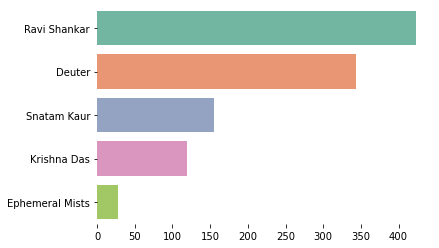

In [63]:
plt.figure()
labels = five_pop_artists['Artist_name'].tolist()
counts = five_pop_artists['Listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

In [ ]:
Listen count by user

In [ ]:
We can also get some other information from the feature listen_count. We will answer the folloging questions:

In [ ]:
What was the maximum time the same user listen to a same song?

In [64]:
Listen_counts = pd.DataFrame(song_df.groupby('Listen_count').size(), columns=['count'])

In [65]:
print(f"The maximum time the same user listened to the same songs was: {Listen_counts.reset_index(drop=False)['Listen_count'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 272


In [ ]:
How many times on average the same user listen to a same song?

In [66]:
print(f"On average, a user listen to the same song {song_df['Listen_count'].mean()} times")

On average, a user listen to the same song 5.515291936978684 times


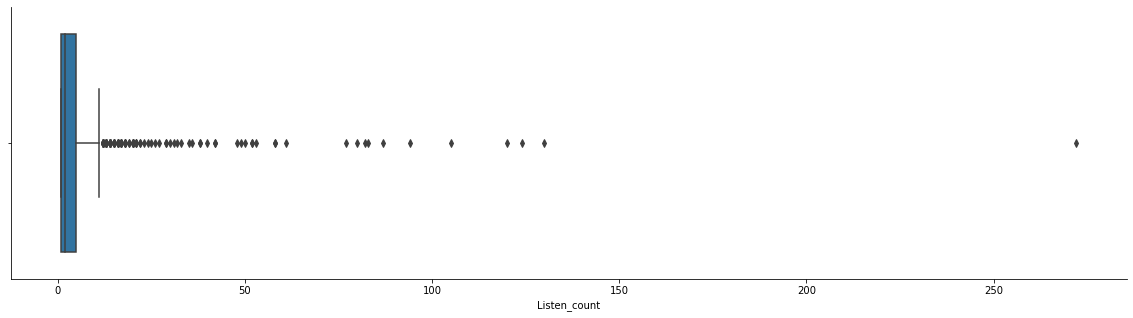

In [67]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Listen_count', data=song_df)
sns.despine()

In [ ]:
What are the most frequent number of times a user listen to the same song?

In [68]:
Listen_counts_temp = Listen_counts[Listen_counts['count'] > 50].reset_index(drop=False)

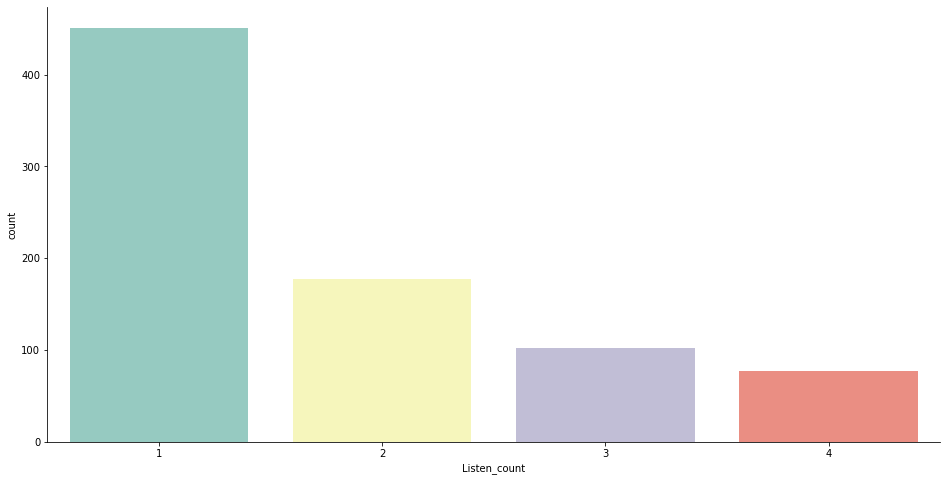

In [69]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Listen_count', y='count', palette='Set3', data=Listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
How many songs does a user listen in average?

In [70]:
song_user = song_df.groupby('User_id')['Song_id'].count()

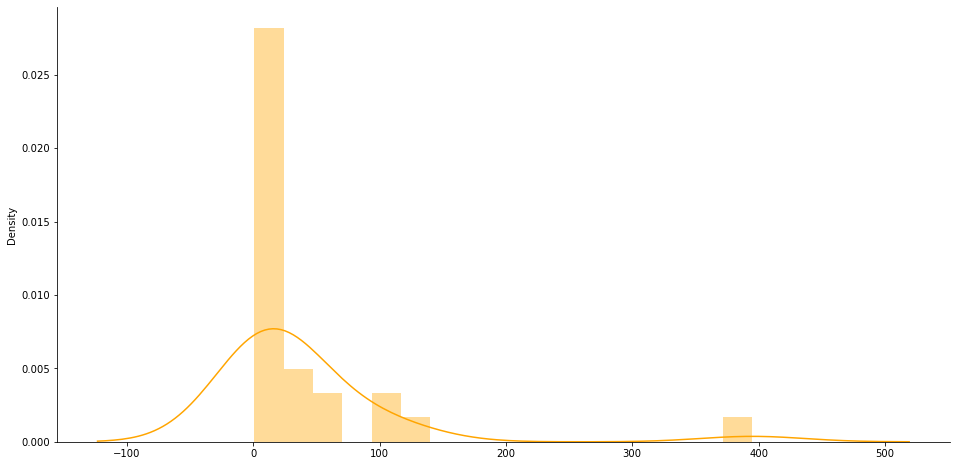

In [71]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [72]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 41.5 songs


In [73]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 14.0 songs, with minimum 1 and maximum 395 songs


In [ ]:
We can see that a user listens in average to 41.5 songs. Even the maximum amount of songs listen by an user is 395, 
and we have 1079 songs in our dataset.

In [ ]:
So, not all user listen to all songs, so a lot of values in the song x users matrix are going to be zero. 
Thus, we’ll be dealing with extremely sparse data.

In [ ]:
How sparse? Let's check that:

In [ ]:
# Get how many values should it be if all songs have been listen by all users. # Substract the total values with the 
actural shape of the DataFrame songs

In [ ]:
#Spare Matrix

In [74]:
from scipy.sparse import csr_matrix

In [ ]:
#pivot

In [75]:
music_users_features = song_df.pivot(index='User_id', columns='Song_id', values='Listen_count').fillna(0)

In [ ]:
# convert dataframe of movie features to scipy sparse matrix

In [77]:
mat_music_users=csr_matrix(music_users_features.values)

In [78]:
music_users_features

Song_id,S1,S10,S100,S1000,S1001,S1002,S1003,S1004,S1005,S1006,...,S990,S991,S992,S993,S994,S995,S996,S997,S998,S999
User_id,,,,,,,,,,,,,,,,,,,,,
0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17aa9f6dbdf753831da8f38c71b66b64373de613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405d396ea64d75b5eaefaaf8ac836f45fa56af4d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45544491ccfcdc0b0803c34f201a6287ed4e30f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4bd88bfb25263a75bbdd467e74018f4ae570e5df,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5a905f000fc1ff3df7ca807d57edb608863db05d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81bde1c3a845c64f1677bd9d28f2da85dfefcf30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just 
select all those users that have listened to at least 16 songs.

In [ ]:
Model recommendations

In [ ]:
So, we know that we want to use the model to predict songs. For that, we'll use the Recommender 
class wrote in the knn_recommender file.

In [ ]:
Using cosine similarity

In [79]:
import knn_recommender as recommender

In [ ]:
import knn_Recommenders as Recommenders # here we imported an important module . This Recommenders is a file. We import 
the file and use the codes inside it. All the three i.e content based, collaberative and popularity every thing is inside the 
Recommenders file . Here we will use directly the code . Any change required can be done in the file .

In [80]:
from sklearn.neighbors import NearestNeighbors

In [81]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20)

In [82]:
model_knn.fit(mat_music_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [ ]:
# Recommender (music_name) => List of Music

In [83]:
def recommender(music_name,data,model,n_recommendations):
    model.fit(data)
    index=process.extractOne(music_name,song_df['Title'])[2]
    print('Music Selected:',song_df['Title'][index],'Index:',index)
    print('Searching for recommendation......')
    distances,indices=model.kneighbors(data[index],n_neighbors=n_recommendations)
    for i in indices:
        print(song_df['Title'][i].where(i!=index))
recommender('Spirales',mat_music_users,model_knn,10)

Music Selected: Spirales Index: 0
Searching for recommendation......
0                                      NaN
19                            Earth Shadow
21                          Healing Circle
16                     Language Of Silence
17                                 Ecstasy
18    Pearls (glittering, continuous flow)
14                                    Four
24                            Dawn Shimmer
23                          Marfa Lights 2
20                         Sea and Silence
Name: Title, dtype: object


In [ ]:
KNN 2

In [6]:
import pandas as pd
import numpy as np

In [7]:
songs = pd.read_csv('C:/Users/aabdu/Desktop/Data Science Project/Data set/song_data.csv')
songs.head()

,Song_id,Title,Artist_name,Type,Album Link
0,S1,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,S2,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,S3,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,S4,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,S5,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


In [8]:
songs.shape

(1079, 5)

In [9]:
users = pd.read_csv('C:/Users/aabdu/Desktop/Data Science Project/Data set/triplets_file.csv')
users.head()

,User id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [10]:
users.shape

(1079, 3)

In [11]:
users['User id'].value_counts()

5a905f000fc1ff3df7ca807d57edb608863db05d    395
bd8475385f0aa78830fa6dfce9e7242164b035c8    118
17aa9f6dbdf753831da8f38c71b66b64373de613    102
baf47ed8da24d607e50d8684cde78b923538640f     98
b64cdd1a0bd907e5e00b39e345194768e330d652     66
d6589314c0a9bcbca4fee0c93b14bc402363afea     48
b80344d063b5ccb3212f76538f3d9e43d87dca9e     45
169f9f4c68b62d1887c7c0ac99d10a79cfca5daf     32
e006b1a48f466bf59feefed32bec6494495a4436     25
f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192     21
0afaa5d9d04bf85af720fe8cc566a41ca3e41c97     20
969cc6fb74e076a68e36a04409cb9d3765757508     19
403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4     15
4bd88bfb25263a75bbdd467e74018f4ae570e5df     13
9d6f0ead607ac2a6c2460e4d14fb439a146b7dec     11
a1380d458c15706b9d5282304db81a5a78352e96      9
bd4c6e843f00bd476847fb75c47b4fb430a06856      8
9bb911319fbc04f01755814cb5edb21df3d1a336      6
a820d2d4f16bbd53be9e41e0417dfb234bfdfba8      6
c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1      6
45544491ccfcdc0b0803c34f201a6287ed4e30f8

In [12]:
users.nunique()

User id           26
Song_id         1079
Listen_count      55
dtype: int64

In [13]:
x = users['User id'].value_counts()>5
x[x].shape

(20,)

In [14]:
y = x[x].index
y

Index(['5a905f000fc1ff3df7ca807d57edb608863db05d',
       'bd8475385f0aa78830fa6dfce9e7242164b035c8',
       '17aa9f6dbdf753831da8f38c71b66b64373de613',
       'baf47ed8da24d607e50d8684cde78b923538640f',
       'b64cdd1a0bd907e5e00b39e345194768e330d652',
       'd6589314c0a9bcbca4fee0c93b14bc402363afea',
       'b80344d063b5ccb3212f76538f3d9e43d87dca9e',
       '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf',
       'e006b1a48f466bf59feefed32bec6494495a4436',
       'f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192',
       '0afaa5d9d04bf85af720fe8cc566a41ca3e41c97',
       '969cc6fb74e076a68e36a04409cb9d3765757508',
       '403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4',
       '4bd88bfb25263a75bbdd467e74018f4ae570e5df',
       '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec',
       'a1380d458c15706b9d5282304db81a5a78352e96',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856',
       '9bb911319fbc04f01755814cb5edb21df3d1a336',
       'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8',
       'c737ec8c1b16ce8e39115f4

In [15]:
users = users[users['User id'].isin(y)]

In [16]:
users.head()

,User id,Song_id,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94


In [17]:
song_users = pd.merge(users,songs,on='Song_id')

In [18]:
song_users.head()

,User id,Song_id,Listen_count,Title,Artist_name,Type,Album Link
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S1,272,Spirales,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Spirales
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S2,130,Lovesong from the Mountains,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Lovesong+fr...
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S3,120,Kindred Spirit,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Kindred+Spirit
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S4,105,Temple of Silence,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Temple+of+S...
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,S5,94,Hands Of Love,Deuter,Meditation and relaxation,https://www.last.fm/music/Deuter/_/Hands+Of+Love


In [19]:
song_users_pivot = song_users.pivot_table(columns='User id',index='Title',values='Listen_count')

In [20]:
song_users_pivot

User id,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,17aa9f6dbdf753831da8f38c71b66b64373de613,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,5a905f000fc1ff3df7ca807d57edb608863db05d,969cc6fb74e076a68e36a04409cb9d3765757508,9bb911319fbc04f01755814cb5edb21df3d1a336,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,a1380d458c15706b9d5282304db81a5a78352e96,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,b64cdd1a0bd907e5e00b39e345194768e330d652,b80344d063b5ccb3212f76538f3d9e43d87dca9e,baf47ed8da24d607e50d8684cde78b923538640f,bd4c6e843f00bd476847fb75c47b4fb430a06856,bd8475385f0aa78830fa6dfce9e7242164b035c8,c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1,d6589314c0a9bcbca4fee0c93b14bc402363afea,e006b1a48f466bf59feefed32bec6494495a4436,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192
Title,,,,,,,,,,,,,,,,,,,,
01 Madhuvanti,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02 Dhun in mishra mand,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11. Nirvana Road (Дорога в нирвану),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4AM Hanuman Chalisa,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aad Guray Nameh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kafi holi (spring festival of colours),NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loving a buddha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
raga sindi bhairavi,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
song_users_pivot.fillna(0,inplace=True)
song_users_pivot

User id,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,17aa9f6dbdf753831da8f38c71b66b64373de613,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,5a905f000fc1ff3df7ca807d57edb608863db05d,969cc6fb74e076a68e36a04409cb9d3765757508,9bb911319fbc04f01755814cb5edb21df3d1a336,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,a1380d458c15706b9d5282304db81a5a78352e96,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,b64cdd1a0bd907e5e00b39e345194768e330d652,b80344d063b5ccb3212f76538f3d9e43d87dca9e,baf47ed8da24d607e50d8684cde78b923538640f,bd4c6e843f00bd476847fb75c47b4fb430a06856,bd8475385f0aa78830fa6dfce9e7242164b035c8,c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1,d6589314c0a9bcbca4fee0c93b14bc402363afea,e006b1a48f466bf59feefed32bec6494495a4436,f84f5b5a5c5d1d9fb4866f6488e0d2661b54c192
Title,,,,,,,,,,,,,,,,,,,,
01 Madhuvanti,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02 Dhun in mishra mand,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11. Nirvana Road (Дорога в нирвану),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4AM Hanuman Chalisa,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aad Guray Nameh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kafi holi (spring festival of colours),0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loving a buddha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
raga sindi bhairavi,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
song_users_pivot.shape

(1020, 20)

In [23]:
from scipy.sparse import csr_matrix

In [24]:
song_users_csr = csr_matrix(song_users_pivot)

In [25]:
song_users_csr

<1020x20 sparse matrix of type '<class 'numpy.float64'>'
	with 1029 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute',n_neighbors=6)

In [27]:
model.fit(song_users_csr)

NearestNeighbors(algorithm='brute', n_neighbors=6)

In [28]:
distance,suggestion = model.kneighbors(song_users_pivot.iloc[1000,:].values.reshape(1,-1))

In [29]:
suggestion

array([[ 141, 1003,   97,  529,   27,  767]], dtype=int64)

In [30]:
for i in range(len(suggestion)):
    print(song_users_pivot.index[suggestion[i]])

Index(['Coral Gardens', 'Wind of Dawn', 'Celestial Meadows', 'Night Jasmine',
       'Along the High Ridges', 'Savannah Sunrise'],
      dtype='object', name='Title')
